<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Corona_Virus_2019_Data_Visualization_and_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)


mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"saishur","key":"97c36f52ccb038414d93918c82f58829"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [197]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [199]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -p/content --force

  0% 0.00/4.06k [00:00<?, ?B/s]
100% 4.06k/4.06k [00:00<00:00, 3.50MB/s]


In [200]:
!unzip \*.zip

Archive:  novel-corona-virus-2019-dataset.zip
replace 2019_nCoV_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2019_nCoV_data.csv      


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [202]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/novel-corona-virus-2019-dataset.zip
/content/2019_nCoV_data.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.metricsUUID
/content/.config/logs/2020.01.13/16.37.08.645258.log
/content/.config/logs/2020.01.13/16.37.40.784290.log
/content/.config/logs/2020.01.13/16.37.53.933238.log
/content/.config/logs/2020.01.13/16.37.24.945113.log
/content/.config/logs/2020.01.13/16.37.53.587497.log
/content/.config/logs/2020.01.13/16.37.37.002045.log
/content/.config/configurations/config_default
/content/.kaggle/kaggle.json
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [203]:
CoronaV = pd.read_csv('/content/2019_nCoV_data.csv')
print(CoronaV.head(10))
print('\n')



   Sno Province/State Country      Last Update  Confirmed  Deaths  Recovered
0    1          Anhui   China  1/22/2020 12:00        1.0     0.0        0.0
1    2        Beijing   China  1/22/2020 12:00       14.0     0.0        0.0
2    3      Chongqing   China  1/22/2020 12:00        6.0     0.0        0.0
3    4         Fujian   China  1/22/2020 12:00        1.0     0.0        0.0
4    5          Gansu   China  1/22/2020 12:00        0.0     0.0        0.0
5    6      Guangdong   China  1/22/2020 12:00       26.0     0.0        0.0
6    7        Guangxi   China  1/22/2020 12:00        2.0     0.0        0.0
7    8        Guizhou   China  1/22/2020 12:00        1.0     0.0        0.0
8    9         Hainan   China  1/22/2020 12:00        4.0     0.0        0.0
9   10          Hebei   China  1/22/2020 12:00        1.0     0.0        0.0




In [204]:
print(CoronaV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
Sno               497 non-null int64
Province/State    393 non-null object
Country           497 non-null object
Last Update       497 non-null object
Confirmed         497 non-null float64
Deaths            497 non-null float64
Recovered         497 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.3+ KB
None


In [0]:
#normalize the dataset
CoronaV = CoronaV.drop('Sno', axis = 1)
CoronaV.columns = ['State', 'Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']
CoronaV['Date'] = CoronaV['Date'].apply(pd.to_datetime).dt.normalize() 

In [206]:
CoronaV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
State        393 non-null object
Country      497 non-null object
Date         497 non-null datetime64[ns]
Confirmed    497 non-null float64
Deaths       497 non-null float64
Recovered    497 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 23.4+ KB


In [207]:
CoronaV[['State','Country','Date','Confirmed']].drop_duplicates().shape[0] == CoronaV.shape[0]



True

In [208]:
CoronaV.describe(include = 'all')

,State,Country,Date,Confirmed,Deaths,Recovered
count,393,497,497,497.000000,497.000000,497.000000
unique,45,31,10,NaN,NaN,NaN
top,Shanxi,Mainland China,2020-01-31 00:00:00,NaN,NaN,NaN
freq,10,274,63,NaN,NaN,NaN
first,NaN,NaN,2020-01-22 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2020-01-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,93.410463,2.134809,1.839034
std,NaN,NaN,NaN,509.676135,18.107540,11.344773
min,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2.000000,0.000000,0.000000


In [209]:
CoronaV[['Country','State']][CoronaV['State'].isnull()].drop_duplicates()

,Country,State
35,Japan,NaN
36,Thailand,NaN
37,South Korea,NaN
76,Singapore,NaN
77,Philippines,NaN
78,Malaysia,NaN
79,Vietnam,NaN
80,Australia,NaN
81,Mexico,NaN
82,Brazil,NaN


In [210]:
CoronaV[CoronaV['Country'].isin(list(CoronaV[['Country','State']][CoronaV['State'].isnull()]['Country'].unique()))]['State'].unique()

array([nan, 'New South Wales', 'Victoria', 'Queensland'], dtype=object)

In [211]:
CoronaV.State.unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'Bavaria', 'British Columbia',
       'Queensland'], dtype=object)

In [212]:
CoronaV.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK'], dtype=object)

In [213]:
print(CoronaV[CoronaV['Country'].isin(['China', 'Mainland China'])].groupby('Country')['State'].unique())
print(CoronaV[CoronaV['Country'].isin(['China', 'Mainland China'])].groupby('Country')['Date'].unique())


Country
China             [Anhui, Beijing, Chongqing, Fujian, Gansu, Gua...
Mainland China    [Anhui, Beijing, Chongqing, Fujian, Gansu, Gua...
Name: State, dtype: object
Country
China                               [2020-01-22T00:00:00.000000000]
Mainland China    [2020-01-23T00:00:00.000000000, 2020-01-24T00:...
Name: Date, dtype: object


In [214]:
CoronaV['Country'] = CoronaV['Country'].replace(['Mainland China'], 'China') #set 'Mainland China' to 'China'
sorted(CoronaV.Country.unique())

['Australia',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Macau',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'US',
 'United Arab Emirates',
 'Vietnam']

In [215]:
print(CoronaV.head())


       State Country       Date  Confirmed  Deaths  Recovered
0      Anhui   China 2020-01-22        1.0     0.0        0.0
1    Beijing   China 2020-01-22       14.0     0.0        0.0
2  Chongqing   China 2020-01-22        6.0     0.0        0.0
3     Fujian   China 2020-01-22        1.0     0.0        0.0
4      Gansu   China 2020-01-22        0.0     0.0        0.0


In [216]:
china = CoronaV[CoronaV['Country']=='China']
china.head()

,State,Country,Date,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22,1.0,0.0,0.0
1,Beijing,China,2020-01-22,14.0,0.0,0.0
2,Chongqing,China,2020-01-22,6.0,0.0,0.0
3,Fujian,China,2020-01-22,1.0,0.0,0.0
4,Gansu,China,2020-01-22,0.0,0.0,0.0


Text(0.5, 0, 'Date')

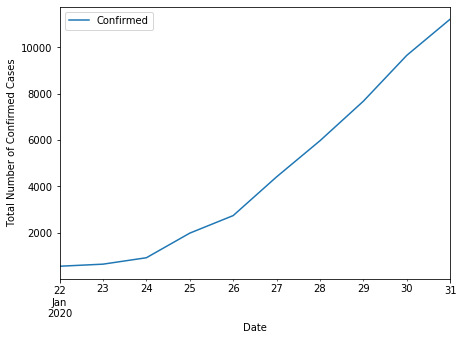

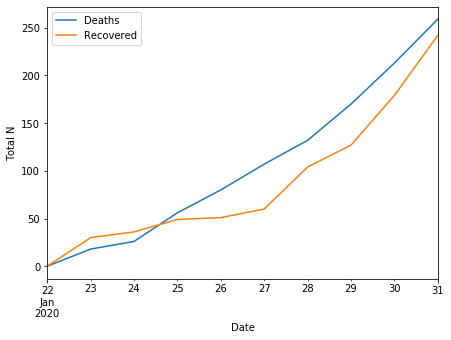

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,5)
ax1 = china[['Date','Confirmed']].groupby(['Date']).sum().plot()
ax1.set_ylabel("Total Number of Confirmed Cases")
ax1.set_xlabel("Date")

ax2 = china[['Date','Deaths', 'Recovered']].groupby(['Date']).sum().plot()
ax2.set_ylabel("Total N")
ax2.set_xlabel("Date")


In [218]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, specs=[[{"type" : "pie"}, {"type" : "pie"},{"type" : "pie"}]],
                    subplot_titles=("number of provience in countries", "Deaths", "Recovers"))

fig.add_trace(
    go.Pie(labels=CoronaV.groupby('Country')['State'].nunique().sort_values(ascending=False)[:10].index,
           values=CoronaV.groupby('Country')['State'].nunique().sort_values(ascending=False)[:10].values),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=CoronaV[CoronaV.Deaths > 0].groupby('Country')["Deaths"].sum().index,
           values=CoronaV[CoronaV.Deaths > 0].groupby('Country')["Deaths"].sum().values),
    row=1, col=2
)
fig.add_trace(
    go.Pie(labels=CoronaV.groupby('Country')["Recovered"].sum().sort_values(ascending=False).index[:4],
           values=CoronaV.groupby('Country')["Recovered"].sum().sort_values(ascending=False).values[:4]),
    row=1, col=3
)

fig.update_layout(height=400, showlegend=True)
fig.show()



In [219]:
CoronaV['Date'] = pd.to_datetime(CoronaV['Date'])
CoronaV['Day'] = CoronaV['Date'].apply(lambda x : x.day)
CoronaV['Hour'] = CoronaV['Date'].apply(lambda x : x.hour)

CoronaV = CoronaV[CoronaV['Confirmed'] != 0]
CoronaV


,State,Country,Date,Confirmed,Deaths,Recovered,Day,Hour
0,Anhui,China,2020-01-22,1.0,0.0,0.0,22,0
1,Beijing,China,2020-01-22,14.0,0.0,0.0,22,0
2,Chongqing,China,2020-01-22,6.0,0.0,0.0,22,0
3,Fujian,China,2020-01-22,1.0,0.0,0.0,22,0
5,Guangdong,China,2020-01-22,26.0,0.0,0.0,22,0
...,...,...,...,...,...,...,...,...
492,NaN,Italy,2020-01-31,2.0,0.0,0.0,31,0
493,NaN,Sweden,2020-01-31,1.0,0.0,0.0,31,0
494,NaN,Russia,2020-01-31,2.0,0.0,0.0,31,0
495,NaN,Spain,2020-01-31,1.0,0.0,0.0,31,0


In [220]:
global_case = CoronaV.groupby('Country')['Confirmed','Deaths','Recovered'].sum().reset_index()
global_case.head()


,Country,Confirmed,Deaths,Recovered
0,Australia,43.0,0.0,4.0
1,Cambodia,5.0,0.0,0.0
2,Canada,13.0,0.0,0.0
3,China,45756.0,1061.0,878.0
4,Finland,3.0,0.0,0.0


In [221]:
global_case

,Country,Confirmed,Deaths,Recovered
0,Australia,43.0,0.0,4.0
1,Cambodia,5.0,0.0,0.0
2,Canada,13.0,0.0,0.0
3,China,45756.0,1061.0,878.0
4,Finland,3.0,0.0,0.0
5,France,31.0,0.0,0.0
6,Germany,20.0,0.0,0.0
7,Hong Kong,68.0,0.0,0.0
8,India,2.0,0.0,0.0
9,Italy,4.0,0.0,0.0


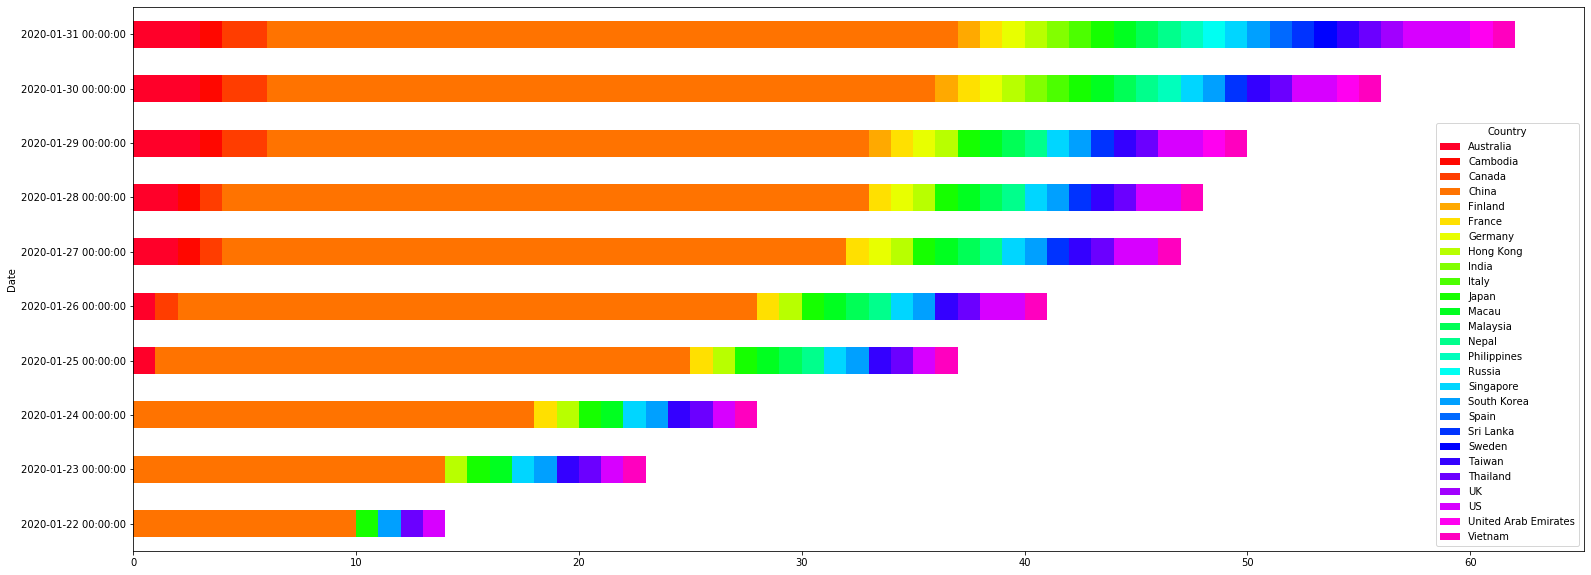

In [223]:
CoronaV.groupby(['Date','Country']).agg({
    'Confirmed': pd.Series.nunique,
}).reset_index().pivot(index='Date',columns='Country',values='Confirmed').plot.barh(stacked=True,figsize=(26,10),colormap='gist_rainbow')

Text(0.5, 0, 'Total Confirmed Cases')

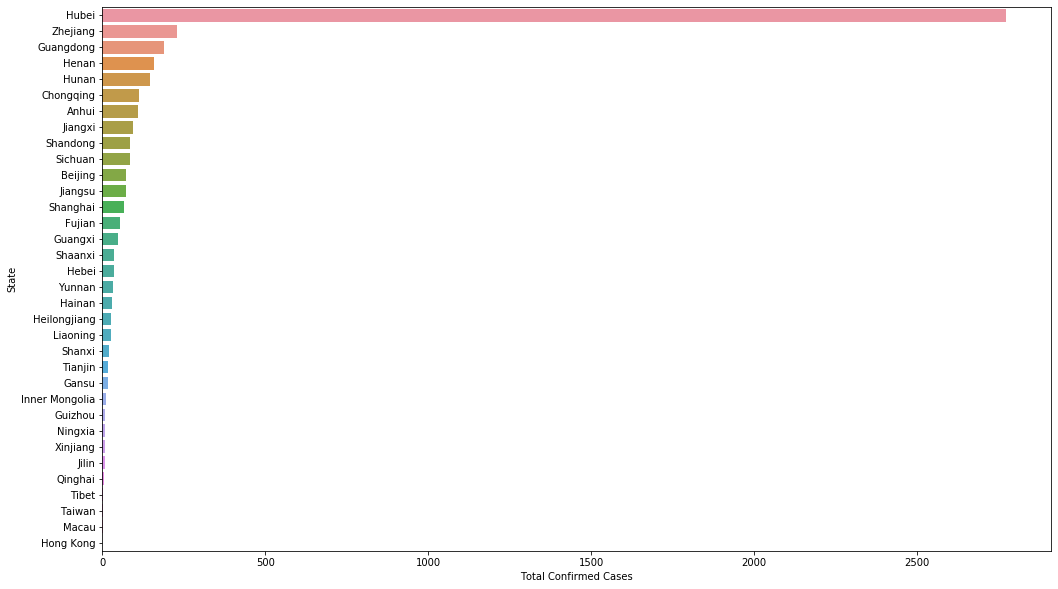

In [224]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
plt.rcParams["figure.figsize"] = (17,10)
nums = china.groupby(["State"])['Confirmed'].aggregate(sum).reset_index().sort_values('Confirmed', ascending= False)
ax = sns.barplot(x="Confirmed", y="State", order = nums['State'], data=china, ci=None) 
ax.set_xlabel("Total Confirmed Cases")



In [0]:
def get_ci(N,p):
    lci = (p - 1.96*(((p*(1-p))/N) ** 0.5))*100
    uci = (p + 1.96*(((p*(1-p))/N) ** 0.5))*100
    return str(np.round(lci,3)) + "% - " + str(np.round(uci,3)) + '%'

In [232]:
final = CoronaV[CoronaV.Date==np.max(CoronaV.Date)]
final = final.copy()

final['CFR'] = np.round((final.Deaths.values/final.Confirmed.values)*100,3)
final['CFR 95% CI'] = final.apply(lambda row: get_ci(row['Confirmed'],row['CFR']/100),axis=1)
global_cfr = np.round(np.sum(final.Deaths.values)/np.sum(final.Confirmed.values)*100, 3)
final.sort_values('CFR', ascending= False).head(10)



,State,Country,Date,Confirmed,Deaths,Recovered,Day,Hour,CFR,CFR 95% CI
434,Hubei,China,2020-01-31,7153.0,249.0,169.0,31,0,3.481,3.056% - 3.906%
453,Heilongjiang,China,2020-01-31,59.0,2.0,0.0,31,0,3.390,-1.228% - 8.008%
454,Hainan,China,2020-01-31,58.0,1.0,1.0,31,0,1.724,-1.626% - 5.074%
448,Hebei,China,2020-01-31,96.0,1.0,0.0,31,0,1.042,-0.989% - 3.073%
446,Beijing,China,2020-01-31,139.0,1.0,5.0,31,0,0.719,-0.686% - 2.124%
445,Shanghai,China,2020-01-31,153.0,1.0,9.0,31,0,0.654,-0.623% - 1.931%
437,Henan,China,2020-01-31,352.0,2.0,3.0,31,0,0.568,-0.217% - 1.353%
443,Sichuan,China,2020-01-31,177.0,1.0,1.0,31,0,0.565,-0.539% - 1.669%
440,Chongqing,China,2020-01-31,238.0,1.0,1.0,31,0,0.420,-0.402% - 1.242%
475,NaN,Singapore,2020-01-31,16.0,0.0,0.0,31,0,0.000,0.0% - 0.0%


Average CFR % = 2.277


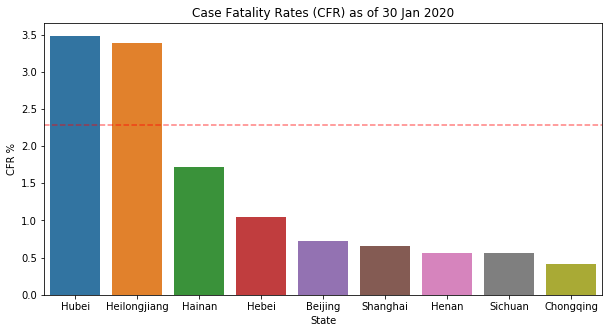

In [227]:
tops = final.sort_values('CFR', ascending= False)
tops = tops[tops.CFR >0]
df = final[final['CFR'] != 0]
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(y="CFR", x="State", order = tops['State'], data=df, ci=None) 
ax.axhline(global_cfr, alpha=.5, color='r', linestyle='dashed')
ax.set_title('Case Fatality Rates (CFR) as of 30 Jan 2020')
ax.set_ylabel('CFR %')
print('Average CFR % = ' + str(global_cfr))



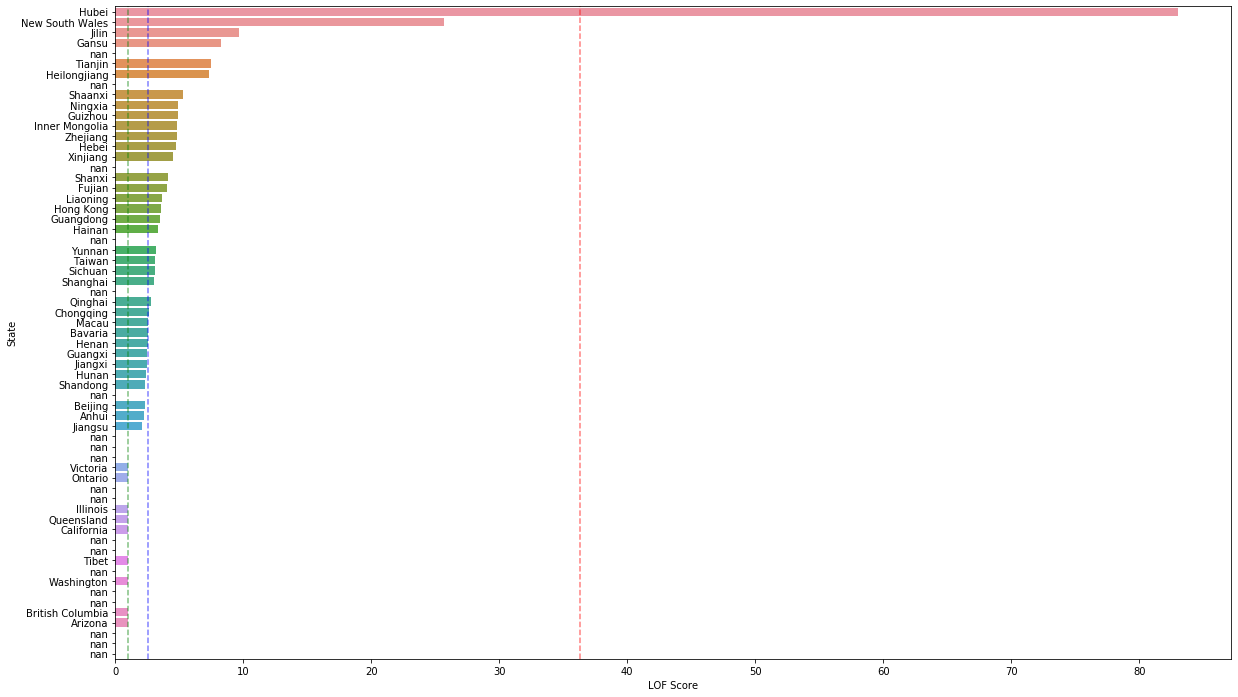

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
scaler = StandardScaler()
scd = scaler.fit_transform(final[['Confirmed','Deaths','Recovered']])
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1) #LOF is very sensitive to the choice of n_neighbors. Generally, n_neighbors = 20 works better
clf.fit(scd)
lofs = clf.negative_outlier_factor_*-1
final['LOF Score'] = lofs
tops = final.sort_values('LOF Score', ascending= False)
plt.rcParams["figure.figsize"] = (20,12)
ax = sns.barplot(x="LOF Score", y="State", order = tops['State'], data=final, ci=None) 
ax.axvline(1, alpha=.5, color='g', linestyle='dashed')
ax.axvline(np.median(lofs), alpha=.5, color='b', linestyle='dashed')
ax.axvline(np.mean(lofs) + 3*np.std(lofs), alpha=.5, color='r', linestyle='dashed')


In [237]:
final.sort_values('LOF Score', ascending=False)

,State,Country,Date,Confirmed,Deaths,Recovered,Day,Hour,CFR,CFR 95% CI,LOF Score
434,Hubei,China,2020-01-31,7153.0,249.0,169.0,31,0,3.481,3.056% - 3.906%,83.042738
484,New South Wales,Australia,2020-01-31,4.0,0.0,2.0,31,0,0.000,0.0% - 0.0%,25.651829
462,Jilin,China,2020-01-31,14.0,0.0,1.0,31,0,0.000,0.0% - 0.0%,9.698244
456,Gansu,China,2020-01-31,35.0,0.0,0.0,31,0,0.000,0.0% - 0.0%,8.259252
472,NaN,Japan,2020-01-31,17.0,0.0,1.0,31,0,0.000,0.0% - 0.0%,7.611789
...,...,...,...,...,...,...,...,...,...,...,...
481,British Columbia,Canada,2020-01-31,1.0,0.0,0.0,31,0,0.000,0.0% - 0.0%,0.986765
471,Arizona,US,2020-01-31,1.0,0.0,0.0,31,0,0.000,0.0% - 0.0%,0.986765
483,NaN,Sri Lanka,2020-01-31,1.0,0.0,0.0,31,0,0.000,0.0% - 0.0%,0.986765
482,NaN,Cambodia,2020-01-31,1.0,0.0,0.0,31,0,0.000,0.0% - 0.0%,0.986765


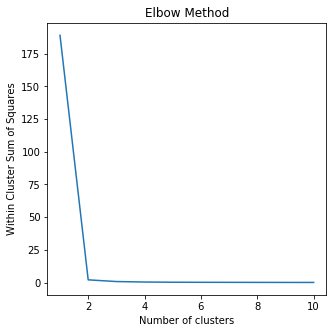

In [238]:
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (5,5)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1897)
    kmeans.fit(scd)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()


In [239]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1897)
clusters = np.where(kmeans.fit_predict(scd) == 0, 'Cluster 1', 'Cluster 2')
clusters

array(['Cluster 2', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1',
       'Cluster 1', 'Cluster 1', 'Cluster 1'], dtype='<U9')

In [240]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(scd)
X = pca.transform(scd)
print(pca.explained_variance_ratio_.cumsum())



[0.99572676 0.99882401 1.        ]


Text(0, 0.5, 'Principal Component 2')

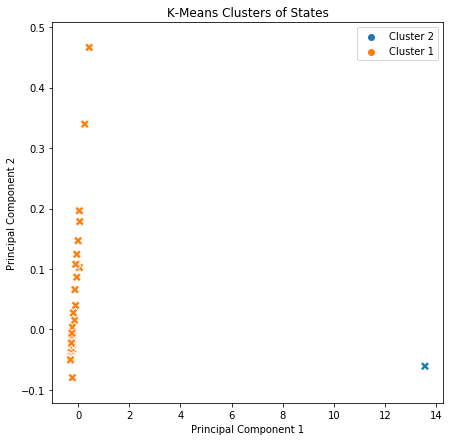

In [241]:
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.scatterplot(X[:,0], X[:,1], marker = 'X', s = 80, hue=clusters)
ax.set_title('K-Means Clusters of States')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

In [242]:
pd.DataFrame(final.State.values, clusters)

,0
Cluster 2,Hubei
Cluster 1,Zhejiang
Cluster 1,Guangdong
Cluster 1,Henan
Cluster 1,Hunan
...,...
Cluster 1,NaN
Cluster 1,NaN
Cluster 1,NaN
Cluster 1,NaN


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltf
rom sklearn.cluster import KMeans
%matplotlib inlineX= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = ‘b’)
plt.show()
from sklearn.cluster import KMeansKmean = KMeans(n_clusters=2)Kmean.fit(X)Kmean.cluster_centers_plt.scatter(X[ : , 0], X[ : , 1], s =50, c=’b’)plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)plt.show()

In [0]:
X_train = CoronaV.values[0:414]
X_test = CoronaV.values[414:]

In [0]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train.shape
X_test.shape

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)